In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math

In [2]:
diamonds = sns.load_dataset("diamonds")

In [3]:
#log of price 

diamonds['log_price'] = [np.log(x) for x in diamonds['price']]

In [4]:
diamonds_sub = diamonds[['color', 'price', 'log_price']]

In [5]:
diamonds_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   color      53940 non-null  category
 1   price      53940 non-null  int64   
 2   log_price  53940 non-null  float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 896.0 KB


In [6]:
diamonds_sub.color.unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [ ]:
#Change datatype to object

diamonds_sub.loc[:, 'color'] = diamonds_sub["color"].astype('object')

In [8]:
# Excluding Color grade G and J

condition = (diamonds_sub['color'] != 'G') & (diamonds_sub['color'] != 'J')
diamonds_sub = diamonds_sub[condition]

In [9]:
diamonds_sub.reset_index(drop=True, inplace=True)

In [10]:
diamonds_sub.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


<Axes: xlabel='color', ylabel='log_price'>

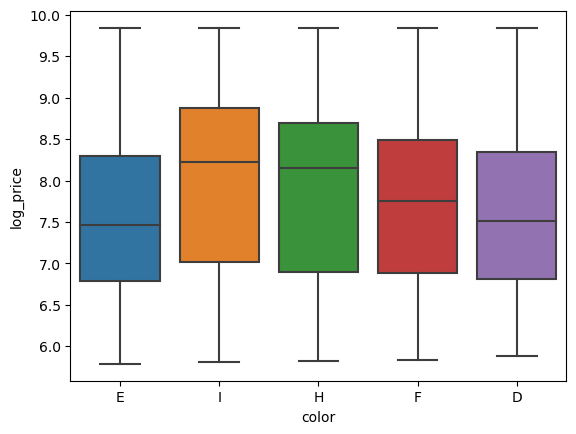

In [11]:
# Checking if there's a variation in price based on color grade
sns.boxplot(data= diamonds_sub, x= 'color', y = 'log_price')

#### Testing to see if the price varies based on color grade

   #### First, Let's the Multiple Regression model to see if there's a correlation between Price and Color

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [16]:
formula = "log_price ~ C(color)" #y ~ x

OLS = ols(formula=formula, data= diamonds_sub)

model = OLS.fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Thu, 28 Sep 2023   Prob (F-statistic):          3.61e-225
Time:                        01:00:05   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## One - way ANOVA test
### Does the price differ between various colours?
 
#### H0 - There's no difference in the price of the diamonds based on colour grade

#### H1 - A difference in the price of the diamonds based on colour grade exists

In [18]:
sm.stats.anova_lm(model, typ = 2) #Using Typ 2 because its just 1 category there is no hierarchy or particular order in the colours

,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


#### p value is very small. So H0 is rejected. There is a statistical significance in the difference in price based on colour grade
#### ANOVA test only tells us that at least 1 of the colours have different prices. 
### Going indept with a Post Hoc Pairwise test 


In [30]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [31]:
tukey_1way = pairwise_tukeyhsd(endog= diamonds_sub['log_price'], groups= diamonds_sub['color'], alpha=0.05)

In [32]:
tukey_1way.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-0.0375,0.1169,-0.0802,0.0052,False
D,F,0.1455,0.0,0.1026,0.1885,True
D,H,0.3015,0.0,0.2573,0.3458,True
D,I,0.4061,0.0,0.3568,0.4553,True
E,F,0.183,0.0,0.1441,0.2219,True
E,H,0.339,0.0,0.2987,0.3794,True
E,I,0.4436,0.0,0.3978,0.4893,True
F,H,0.156,0.0,0.1154,0.1966,True
F,I,0.2605,0.0,0.2145,0.3065,True
H,I,0.1045,0.0,0.0573,0.1517,True


### We can reject the null hypothesis for all except colour D and E as there is NO statistical difference in price between both colours

## Lets add another variable -  Cut of the diamond. To ascertain if this has an effect on price 

In [20]:
diamonds.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [ ]:
diamonds_sub2 = diamonds[['color', 'cut', 'price', 'log_price']]
diamonds_sub2.loc[:, 'color'] = diamonds_sub2["color"].astype('object') #to object
diamonds_sub2.loc[:, 'cut'] = diamonds_sub2["cut"].astype('object') #to object

condition = (diamonds_sub2['color'] != 'G') & (diamonds_sub2['color'] != 'J')
diamonds_sub2 = diamonds_sub2[condition]

condition2 = (diamonds_sub2['cut'] != 'Good') & (diamonds_sub2['cut'] != 'Fair')
diamonds_sub2 = diamonds_sub2[condition2]

diamonds_sub2.reset_index(drop=True, inplace=True)

In [23]:
diamonds_sub2.head()

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083


In [26]:
formula2 = "log_price ~ C(color) + C(cut) + C(color):C(cut)" #y ~ x (:) for model the effect of interaction of color & cut

OLS2 = ols(formula=formula2, data= diamonds_sub2)

model2 = OLS2.fit()


## Null Hypothesis
Colour: No difference in price based on Colour 
Cut: No difference in price based on Cut
Colour and Cut effect: Effect of color on price is independent of the cut and vice versa

## Alternative Hypothesis
Colour: There is a difference in price based on Colour 
Cut:  There is a  difference in price based on Cut
Colour and Cut effect:  There is an interaction effect between colour and cut on price

In [28]:
sm.stats.anova_lm(model2, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),926.361461,4.0,237.014783,3.481145e-201
C(cut),630.641441,2.0,322.706309,1.348511e-139
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


#### Based on the small p-values, we reject all 3 Null Hypothesis

### Log of the Price is NOT the same for different colours
### Log of the Price is NOT the same for different cuts
### There is an interaction effect between colour and cut on price